In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.shape

(569, 33)

In [4]:
data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data['diagnosis'].replace({'M':1,'B':0},inplace=True)

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
x= data.drop('diagnosis',axis=1)
y= data['diagnosis']

In [11]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state=101)

In [15]:
xtrain.shape

(426, 30)

In [16]:
xtest.shape

(143, 30)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation

In [19]:
ypred = model.predict(xtest)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(ytest,ypred))

[[83  5]
 [ 3 52]]


In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        88
           1       0.91      0.95      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [22]:
model.score(xtest,ytest)*100

94.4055944055944

In [23]:
model.coef_


array([[-2.04173410e+00, -1.40346363e-01,  1.20841193e-01,
        -4.17669155e-03,  1.09415380e-01,  3.75078590e-01,
         5.34628533e-01,  2.76980262e-01,  1.98695464e-01,
         2.09883384e-02, -2.47965668e-02, -9.75184348e-01,
        -3.48390511e-01,  1.37590743e-01,  7.61622843e-03,
         3.91545268e-02,  4.89731279e-02,  3.43802011e-02,
         4.56125403e-02,  1.42304222e-03, -1.49318325e+00,
         3.44476958e-01,  1.12867409e-01,  2.84414988e-02,
         1.89842760e-01,  1.04293228e+00,  1.29832777e+00,
         5.25101486e-01,  5.83754238e-01,  1.01018363e-01]])

In [24]:
coef_data = pd.DataFrame(model.coef_.T,columns=['Coef'],index= xtest.columns)
coef_data

,Coef
radius_mean,-2.041734
texture_mean,-0.140346
perimeter_mean,0.120841
area_mean,-0.004177
smoothness_mean,0.109415
compactness_mean,0.375079
concavity_mean,0.534629
concave points_mean,0.276980
symmetry_mean,0.198695
fractal_dimension_mean,0.020988


In [25]:
coef_data.sort_values(by='Coef',ascending=False)

,Coef
concavity_worst,1.298328
compactness_worst,1.042932
symmetry_worst,0.583754
concavity_mean,0.534629
concave points_worst,0.525101
compactness_mean,0.375079
texture_worst,0.344477
concave points_mean,0.276980
symmetry_mean,0.198695
smoothness_worst,0.189843


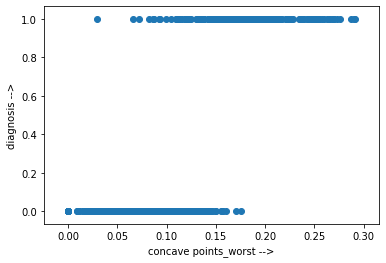

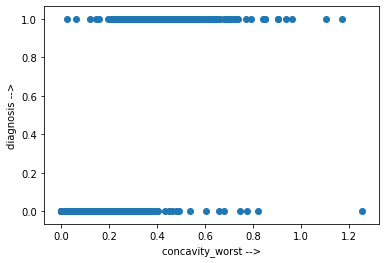

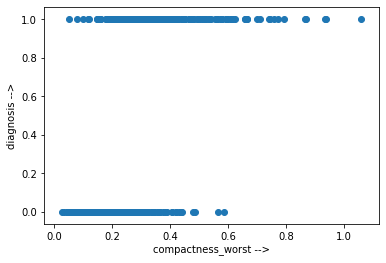

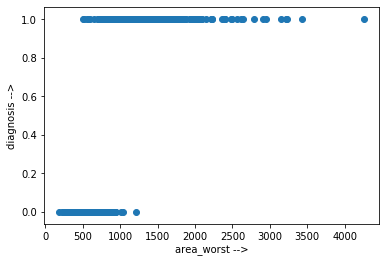

In [26]:
for i in ['concave points_worst','concavity_worst','compactness_worst','area_worst']:
    plt.scatter(data[i],data['diagnosis'])
    plt.xlabel("{} -->".format(i))
    plt.ylabel("diagnosis -->")
    plt.show()

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

In [28]:
d = {'Importance': np.round(tree.feature_importances_, 3) , 'Features': xtrain.columns}
feature_imp = pd.DataFrame(data=d)
feature_imp.sort_values(by='Importance',ascending=False)

,Importance,Features
27,0.703,concave points_worst
23,0.107,area_worst
13,0.056,area_se
19,0.037,fractal_dimension_se
1,0.033,texture_mean
10,0.014,radius_se
18,0.013,symmetry_se
6,0.012,concavity_mean
21,0.010,texture_worst
12,0.008,perimeter_se


In [29]:
from sklearn.ensemble import ExtraTreesClassifier
modelx = ExtraTreesClassifier(n_estimators=10)
modelx.fit(xtrain, ytrain)
coef = modelx.feature_importances_

In [30]:
coef_modelx= pd.DataFrame(coef.T,columns=['Coef'],index= xtest.columns)

In [31]:
coef_modelx.sort_values(by='Coef',ascending=False)

,Coef
concave points_worst,0.150659
perimeter_mean,0.102758
radius_mean,0.095709
area_mean,0.078646
area_worst,0.078581
radius_worst,0.052671
concave points_mean,0.045144
texture_worst,0.040633
perimeter_se,0.036894
concavity_mean,0.035408


In [32]:
xtrain1= xtrain[['concave points_worst','concavity_worst','compactness_worst','area_worst']]
xtest1= xtest[['concave points_worst','concavity_worst','compactness_worst','area_worst']]

In [33]:
model2 = LogisticRegression()

In [34]:
model2.fit(xtrain1,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
model2.score(xtest1,ytest)*100

97.2027972027972

In [36]:
ypred = model2.predict(xtest1)
print(confusion_matrix(ytest,ypred))

[[87  1]
 [ 3 52]]


In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



### Deployment

In [38]:
final_model = model2

In [39]:
pd.to_pickle(final_model,'BreastCancerPredictor') # Saving the model

In [40]:
model = pd.read_pickle('BreastCancerPredictor')

In [41]:
concave_points_worst = eval(input(''))
concavity_worst = eval(input(''))
compactness_worst = eval(input(''))
area_worst =  eval(input(''))

query = pd.DataFrame({
    'area_worst':[area_worst],
    'concave points_worst':[concave_points_worst],
    'concavity_worst':[concavity_worst],
    'compactness_worst': [compactness_worst]
})

2019
0.2654
0.7119
0.6656


In [42]:
query

,area_worst,concave points_worst,concavity_worst,compactness_worst
0,0.6656,2019,0.2654,0.7119


In [45]:
print('Diagnosed as: {}'.format(model.predict(query)[0]))  # 1 Means Melignant(Have Cancer) and 0 means Benign(No Cancer)

Diagnosed as: 1
